In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(pic,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    myplot = fig.add_subplot(111)
    myplot.imshow(pic,cmap='gray')

In [3]:
tile = cv2.imread('/Users/krishnendukar/Documents/BOOK_CVTENSORFLOW-PACKT/imagehash/tile.jpeg',0)

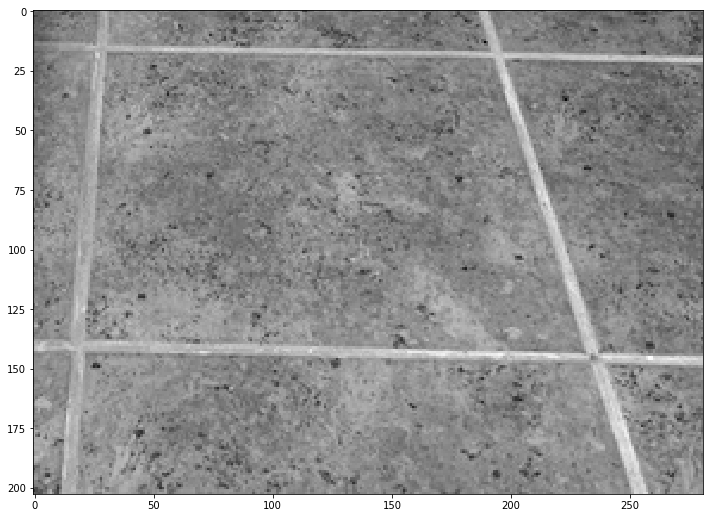

In [4]:
display(tile)

In [5]:
bathroom = cv2.imread('/Users/krishnendukar/Documents/BOOK_CVTENSORFLOW-PACKT/imagehash/IMG_0030.jpeg',0)

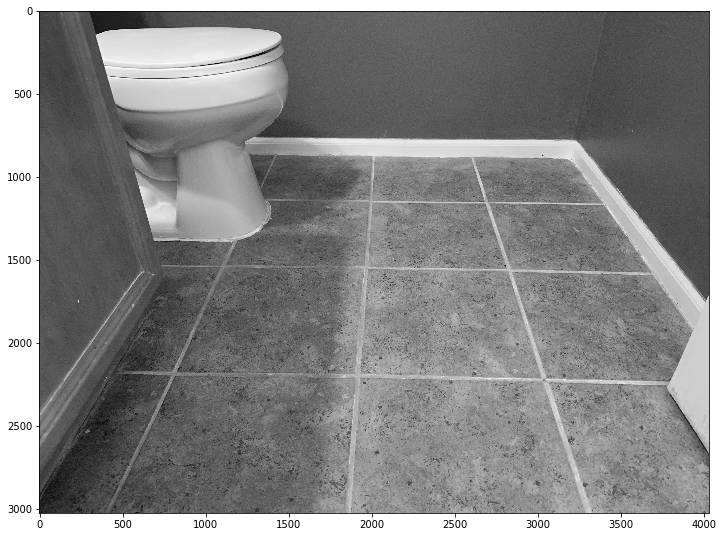

In [6]:
display(bathroom)

In [8]:
orb = cv2.ORB_create()
kp1,des1 = orb.detectAndCompute(tile,None)
kp2,des2 = orb.detectAndCompute(bathroom,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [11]:
matches = bf.match(des1,des2)

In [12]:
matches = sorted(matches,key=lambda x:x.distance)

In [47]:
floor_matches = cv2.drawMatches(tile,kp1,bathroom,kp2,matches[:50],None,flags=2)

TypeError: Expected cv::DMatch for argument 'matches1to2'

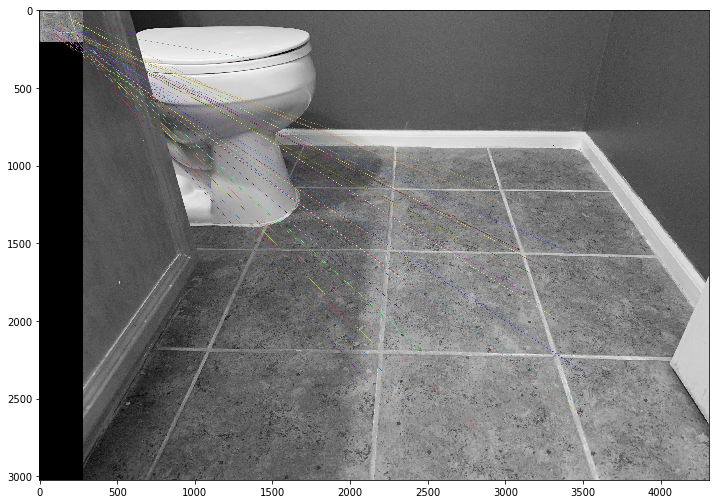

In [23]:
display(floor_matches)

In [24]:
sift = cv2.xfeatures2d.SIFT_create()

In [25]:
kp1,des1 = sift.detectAndCompute(tile,None)
kp2,des2 = sift.detectAndCompute(bathroom,None)

In [26]:
bf = cv2.BFMatcher()

In [27]:
matches = bf.knnMatch(des1,des2,k=2)

In [101]:
good = []
for match1,match2 in matches:
    if match1.distance < 1.2*match2.distance:
        good.append([match1])

In [102]:
draw_params = dict(matchColor=(0,0,255),singlePointColor=(0,0,255))
sift_matches = cv2.drawMatchesKnn(tile,kp1,bathroom,kp2,good,None,**draw_params)

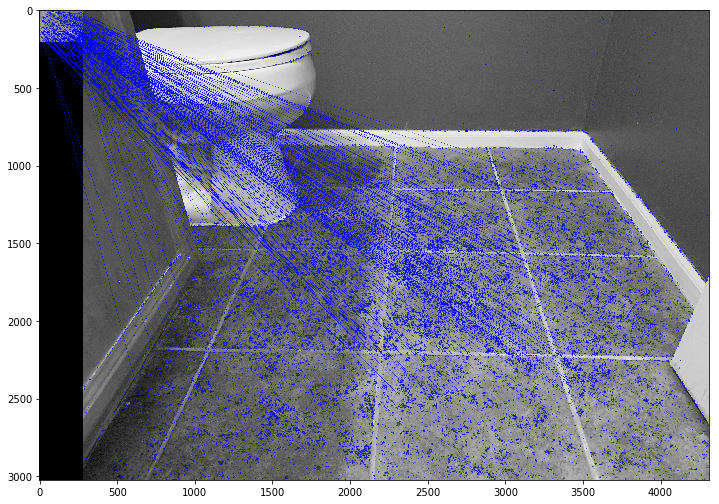

In [103]:
display(sift_matches)

In [55]:
sift = cv2.xfeatures2d.SIFT_create()

In [56]:
kp1,des1 = sift.detectAndCompute(tile,None)
kp2,des2 = sift.detectAndCompute(bathroom,None)

In [85]:
flann_index_kdtree=0
index_params = dict(algorithm = flann_index_kdtree,trees=7)
search_params = dict(checks=50)

In [86]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [87]:
matches = flann.knnMatch(des1,des2,k=2)

In [88]:
matchesMask = [[0,0] for i in range(len(matches))]

In [89]:

for i,(match1,match2) in enumerate(matches):
    if match1.distance <1.2*match2.distance:
        matchesMask[i]=[1,0]

In [90]:
draw_params = dict(matchColor=(255,0,0),singlePointColor=(0,0,255),matchesMask=matchesMask,flags=2)

In [91]:
flann_matches = cv2.drawMatchesKnn(tile,kp1,bathroom,kp2,matches,None,**draw_params)

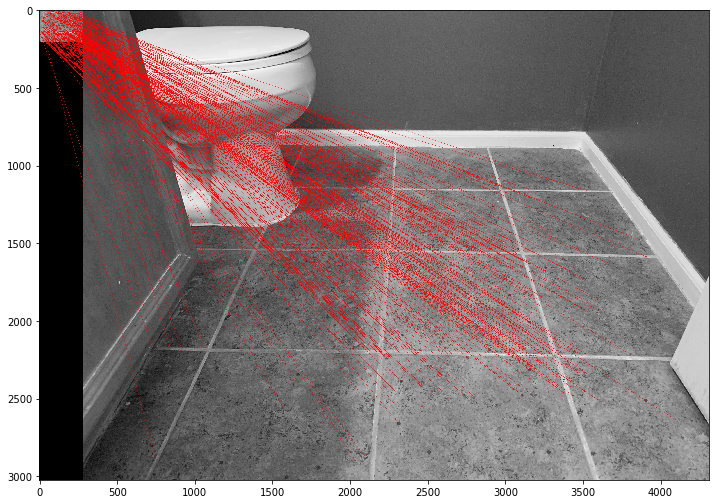

In [92]:
display(flann_matches)